In [77]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, accuracy_score, f1_score, balanced_accuracy_score, classification_report 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.datasets import fetch_openml

# Part 1: Naive Bayes for categorical features
## Predicting 'car acceptability' from categorical features.
You will use the "car evaluation" dataset (car_eval.csv) from the UC Irvine Machine Learning Repository to train a Naive Bayes classifier to predict 'car acceptability' from six categorical features. More information about the dataset can be found at https://archive.ics.uci.edu/dataset/19/car+evaluation

1. Use LabelEncoder to encode each of the categorical features as well as 'class'. 
2. Train models and compare the results of using some different values for the Laplace smoothing parameter (alpha).
3. Choose a value for alpha based on your testing, train a model and examine the performance on a test set.
4. Display a confusion matrix and classification report.

In [2]:
cars = pd.read_csv('car_eval.csv')
cars

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
X = cars.drop(columns=['class'])
y = cars['class']

In [4]:
cars['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

# 1.1

In [9]:
encoders = {col: LabelEncoder() for col in X.columns}
X_encoded = X.copy()
for col in X.columns:
    X_encoded[col] = encoders[col].fit_transform(X[col])

In [13]:
y_encoded = LabelEncoder().fit_transform(y)

In [8]:
X_encoded

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [14]:
y_encoded

array([2, 2, 2, ..., 2, 1, 3])

# 1.2

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=440)

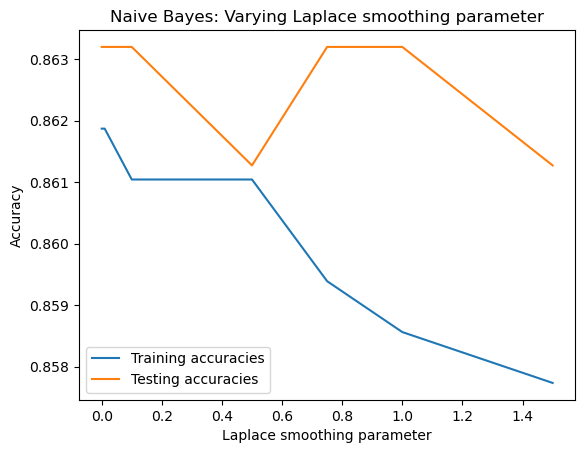

In [30]:
train_accuracies = {}
test_accuracies = {}

values = [ 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 1, 1.5]
for a in values:
    clf = CategoricalNB(alpha = a)
    clf.fit(X_train, y_train)
    train_accuracies[a] = clf.score(X_train, y_train)
    test_accuracies[a] = clf.score(X_test, y_test)
fig, ax = plt.subplots()
ax.plot(values, train_accuracies.values(), 
        label='Training accuracies')
ax.plot(values, test_accuracies.values(), 
        label='Testing accuracies')
plt.xlabel('Laplace smoothing parameter')
plt.ylabel('Accuracy')
plt.title('Naive Bayes: Varying Laplace smoothing parameter')
plt.legend()
plt.show()

In [29]:
test_accuracies

{1e-07: 0.8631984585741811,
 1e-06: 0.8631984585741811,
 1e-05: 0.8631984585741811,
 0.0001: 0.8631984585741811,
 0.001: 0.8631984585741811,
 0.01: 0.8631984585741811,
 0.1: 0.8631984585741811,
 0.5: 0.861271676300578,
 1: 0.8631984585741811,
 1.5: 0.861271676300578}

# 1.3 & 1.4


Test accuracy for alpha=0.0000001: 0.8631984585741811



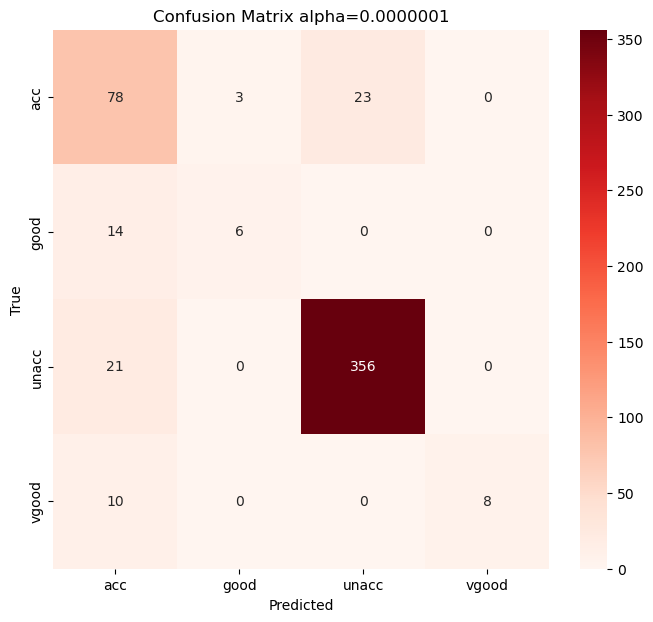


Classification Report:
              precision    recall  f1-score   support

         acc       0.63      0.75      0.69       104
        good       0.67      0.30      0.41        20
       unacc       0.94      0.94      0.94       377
       vgood       1.00      0.44      0.62        18

    accuracy                           0.86       519
   macro avg       0.81      0.61      0.66       519
weighted avg       0.87      0.86      0.86       519



In [47]:
# choosing alpha = 0.0000001

alpha = 0.0000001

nb = CategoricalNB(alpha=alpha)
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy for alpha=0.0000001: {test_acc:}\n")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=encoders['class'].classes_, yticklabels=encoders['class'].classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix alpha=0.0000001')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoders['class'].classes_))

# Part 2: Naive Bayes for counts
## Predicting type of article from a title or description
You will use AG’s News Corpus (AG_News.csv) to train a Naive Bayes classifier to predict the type of article based on a title or description (https://paperswithcode.com/dataset/ag-news). Here is a research paper that used this data: https://paperswithcode.com/paper/character-level-convolutional-networks-for

1. Use CountVectorizer to make count vectors from the text.
2. Train models and compare the results of using some different values for the Laplace smoothing parameter (alpha).
3. Choose a value for alpha based on your testing, train a model and examine the performance on a test set.
4. Display a confusion matrix and classification report.

In [48]:
articles = pd.read_csv('AG_news.csv')
articles

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2
...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0
119996,Renteria signing a top-shelf deal Red Sox gene...,1
119997,Saban not going to Dolphins yet The Miami Dolp...,1
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1


# 2.1

In [52]:
X = articles['text']
y = articles['label']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=440)

In [54]:
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [55]:
X_train_counts

<84000x57024 sparse matrix of type '<class 'numpy.int64'>'
	with 1804991 stored elements in Compressed Sparse Row format>

# 2.2

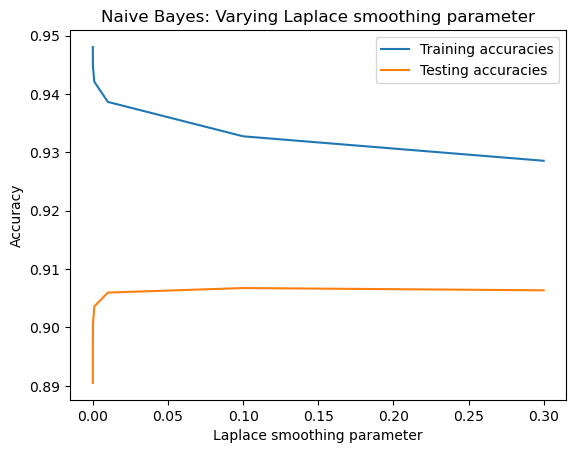

In [60]:
train_accuracies = {}
test_accuracies = {}
values = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.3]
for a in values:
    clf = MultinomialNB(alpha = a)
    clf.fit(X_train_counts, y_train)
    train_accuracies[a] = clf.score(X_train_counts, y_train)
    test_accuracies[a] = clf.score(X_test_counts, y_test)
fig, ax = plt.subplots()
ax.plot(values, train_accuracies.values(), 
        label='Training accuracies')
ax.plot(values, test_accuracies.values(), 
        label='Testing accuracies')
plt.xlabel('Laplace smoothing parameter')
plt.ylabel('Accuracy')
plt.title('Naive Bayes: Varying Laplace smoothing parameter')
plt.legend()
plt.show()

In [61]:
test_accuracies

{1e-07: 0.8905,
 1e-06: 0.8935277777777778,
 1e-05: 0.8969722222222222,
 0.0001: 0.9006111111111111,
 0.001: 0.9036111111111111,
 0.01: 0.9059722222222222,
 0.1: 0.90675,
 0.3: 0.9063611111111111}

# 2.3 & 2.4


Training Accuracy: 0.9327380952380953 

Testing Accuracy: 0.90675 



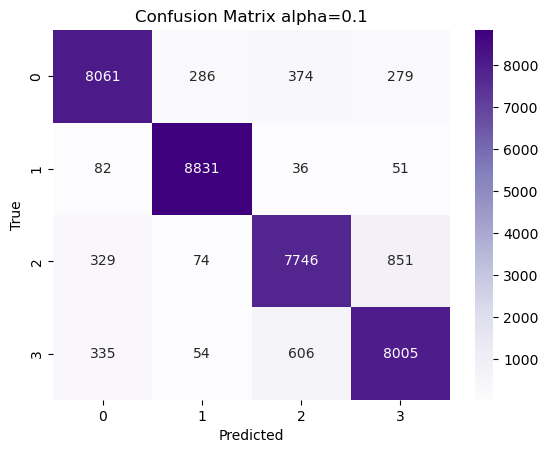


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      9000
           1       0.96      0.98      0.97      9000
           2       0.88      0.86      0.87      9000
           3       0.87      0.89      0.88      9000

    accuracy                           0.91     36000
   macro avg       0.91      0.91      0.91     36000
weighted avg       0.91      0.91      0.91     36000



In [76]:
# choosing alpha=0.1

nb = MultinomialNB(alpha=0.1)
nb.fit(X_train_counts, y_train)
y_pred = nb.predict(X_test_counts)
print('\nTraining Accuracy:', nb.score(X_train_counts, y_train), '\n')
print('Testing Accuracy:',nb.score(X_test_counts, y_test), '\n')



cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples') 
plt.xlabel('Predicted')                            
plt.ylabel('True')
plt.title('Confusion Matrix alpha=0.1')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Part 3: Naive Bayes for quantitative features
## Handwritten digit classification
You will use the MNIST handwritten digit dataset to train a Naive Bayes classifier to predict what digit is written. 

1. Train models and compare the results of using some different values (try several between 0 and 1) for the 'var_smoothing' hyperparameter of GaussianNB. This adds a constant to the variance estimate. The general idea for using this hyperparameter is the following: If your model overfits (too sensitive to small variations in data), try increasing var_smoothing. If your model underfits (too smooth, loses information), try decreasing var_smoothing.
2. Choose a value for 'var_smoothing' based on your testing, train a model and examine the performance on a test set.
3. Display a confusion matrix and classification report.

In [78]:
mnist = fetch_openml('mnist_784', return_X_y=False)
X, y = mnist['data'], mnist['target']
y = y.astype(int)

# 3.1

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=290, stratify=y)

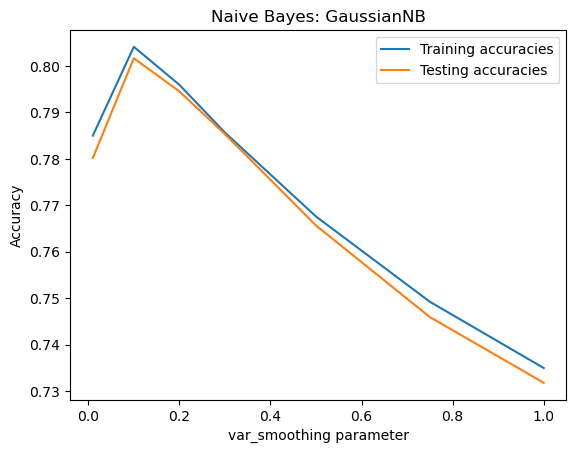

In [96]:
train_accuracies = {}
test_accuracies = {}

values = [ 0.01, 0.1, 0.2, 0.3, 0.5, 0.75, 1]
for a in values:
    gnb = GaussianNB(var_smoothing=a)
    gnb.fit(X_train, y_train)
    train_accuracies[a] = gnb.score(X_train, y_train)
    test_accuracies[a] = gnb.score(X_test, y_test)
fig, ax = plt.subplots()
ax.plot(values, train_accuracies.values(), 
        label='Training accuracies')
ax.plot(values, test_accuracies.values(), 
        label='Testing accuracies')
plt.xlabel('var_smoothing parameter')
plt.ylabel('Accuracy')
plt.title('Naive Bayes: GaussianNB')
plt.legend()
plt.show()

# 3.2 & 3.3


Training Accuracy: 0.8040816326530612 

Testing Accuracy: 0.8016190476190476 



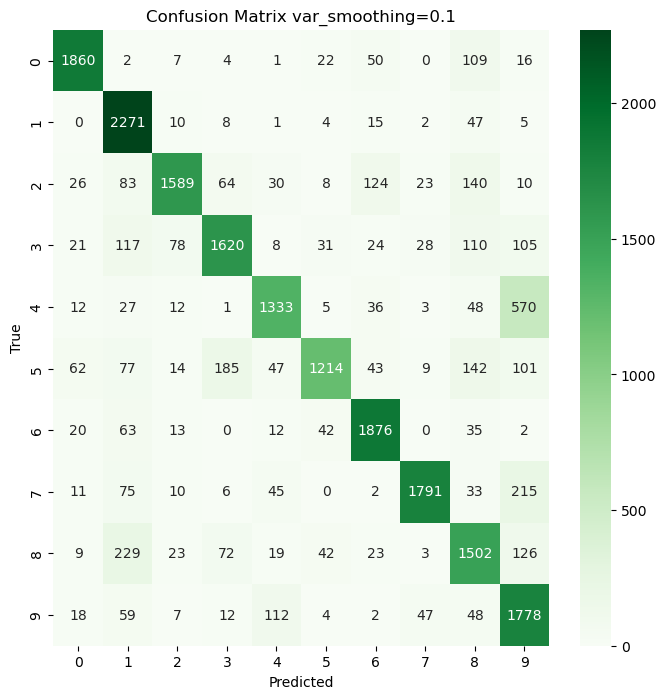


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2071
           1       0.76      0.96      0.85      2363
           2       0.90      0.76      0.82      2097
           3       0.82      0.76      0.79      2142
           4       0.83      0.65      0.73      2047
           5       0.88      0.64      0.74      1894
           6       0.85      0.91      0.88      2063
           7       0.94      0.82      0.87      2188
           8       0.68      0.73      0.70      2048
           9       0.61      0.85      0.71      2087

    accuracy                           0.80     21000
   macro avg       0.82      0.80      0.80     21000
weighted avg       0.82      0.80      0.80     21000



In [95]:
# choosing var_smoothin=0.1

gnb = GaussianNB(var_smoothing=0.1)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('\nTraining Accuracy:', gnb.score(X_train, y_train), '\n')
print('Testing Accuracy:',gnb.score(X_test, y_test), '\n')


cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens') 
plt.xlabel('Predicted')                            
plt.ylabel('True')
plt.title('Confusion Matrix var_smoothing=0.1')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))